# INTRODUCTION

YOLO is an algorithm that uses neural networks to provide real-time object detection. This algorithm is popular because of its speed and accuracy.<br>
We will apply the YOLO algorithm to detect objects in images.We have provided a series of images that you can test the YOLO algorithm on.<br>


# IMPORTING LIBRARIES

In [61]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

# SETTING UP THE NEURAL NETWORK

In [62]:
# Setting the location and name of the cfg file
cfg_file = './cfg/yolov3.cfg'

# Set the location and name of the pre-trained weights file
weight_file = './weights/yolov3.weights'

# Set the location and name of the COCO object classes file
namesfile = 'data/coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

In [63]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

# RESIZING THE IMAGES

Since images have different sizes, we have to resize our images to be compatible with the input size of the first layer in the network. 

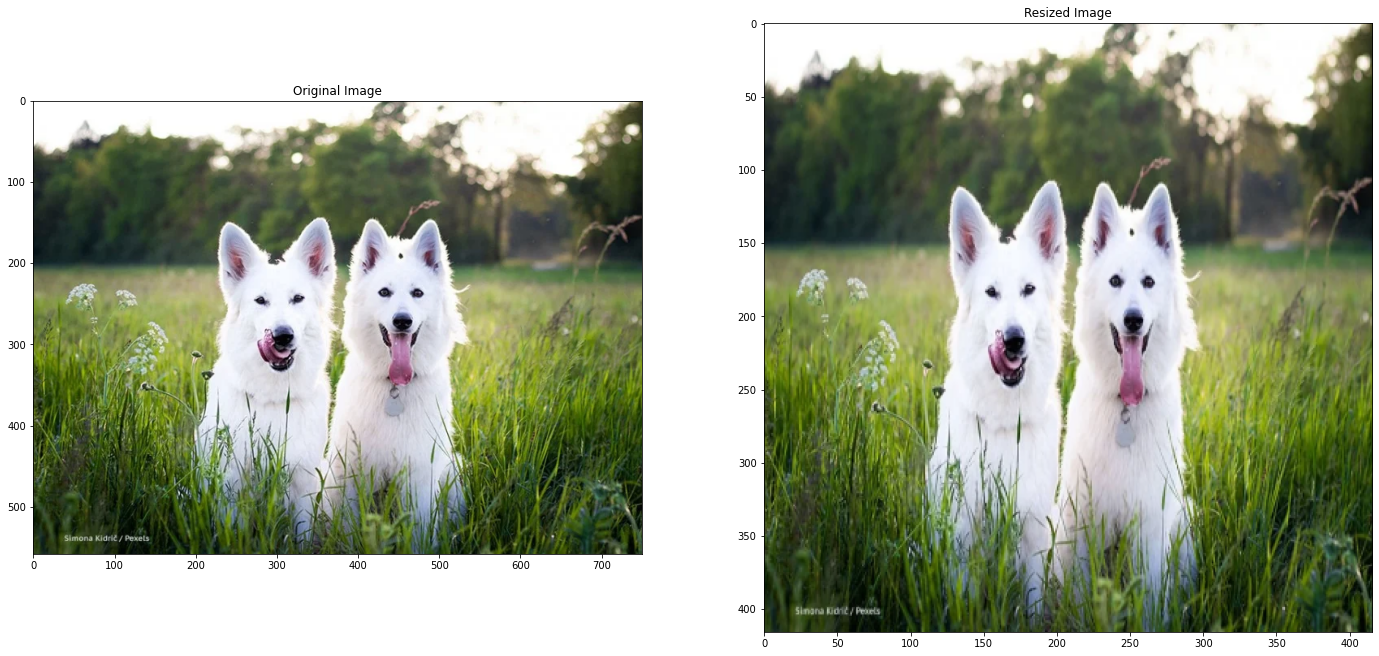

In [64]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./images/dog_4.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

# SETTING UP THE NON-MAXIMUM SUPPRESSION THRESHOLD

YOLO uses Non-Maximal Suppression (NMS) to only keep the best bounding box.<br>
NMS remove all the predicted bounding boxes that have a detection probability less than NMS threshold.<br>
In our code, we set NMS threshold value to be 0.6

In [65]:
# Setting the NMS threshold to 0.6
nms_thresh = 0.6  

# SETTING THE INTERSECTION OVER UNION THRESHOLD

After removing all the predicted bounding boxes that have a low detection probability, the second step in NMS, is to select the bounding boxes with the highest detection probability and eliminate all the bounding boxes whose Intersection Over Union (IOU) value is higher than a given IOU threshold. In our code below, we set IOU threshold value to be 0.4. 

In [66]:
# Set the IOU threshold
iou_thresh = 0.4

# OBJECT DETECTION

We detect the objects using the detect_objects(m, resized_image, iou_thresh, nms_thresh)function from the utils module.
Each bounding box contains 7 parameters: the coordinates (x, y) of the center of the bounding box, the width w and height h of the bounding box, the confidence detection level, the object class probability, and the object class id.The detect_objects() function also prints out the time it took for the YOLO algorithm to detect the objects in the image and the number of objects detected.<br><br>
Once we have the bounding boxes of the objects found by YOLO, we can print the class of the objects found and their corresponding object class probability. To do this we use the print_objects() function in the utils module.<br><br>
At the end, we use the plot_boxes() function to plot the bounding boxes and corresponding object class labels found by YOLO in our image.



It took 1.304 seconds to detect the objects in the image.

Number of Objects Detected: 2 

Objects Found and Confidence Level:

1. dog: 1.000000
2. dog: 1.000000


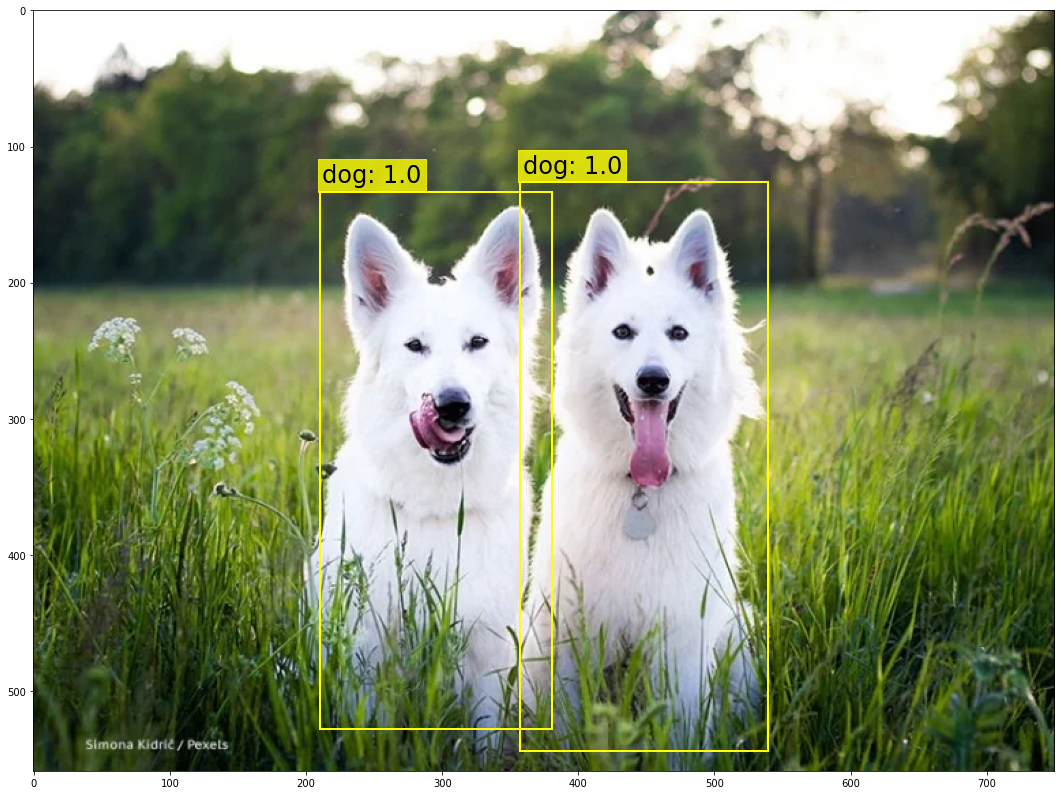

In [67]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./images/dog_4.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Set the IOU threshold. Default value is 0.4
iou_thresh = 0.4

# Set the NMS threshold. Default value is 0.6
nms_thresh = 0.6

# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)